## Gauss分布

#### 极大似然估计(Maximize Likehood Estimate)

$$ \hat{\theta}_{mle} = \arg\max\limits_{\theta} P(X|\theta) $$

- 假设样本$X$中有$N$个样本, 每个样本$x_{i}$ 为p维度数据, 所有的样本都独立同分布;

- 求最优的 $\theta$ 使得对于这部分数据来说, 出现的概率最大, 也就是说需要将每个样本出现的概率用 $p(x_{i}|\theta)$ 计算并相乘, 就是整个样本X 在 $P(X|\theta)$ 下的概率

- 假设维度 $p = 1,  \theta $= GDD $(\mu, \sigma^{2})$ then  $P(x) = \dfrac{1}{\sqrt{2\pi} \sigma }e^{-\dfrac{(x-\mu)^2}{2\sigma^2}} $

- 对 $P(X|\theta)$ 取对数, 因为 $L(\theta)$与 $lnL(\theta)$ 在同一$\theta$处取到极值, 将其展开后得到:

$$ logP(X|\theta) = \sum^{N}_{i=1}[log\dfrac{1}{\sqrt{2\pi}} + log\dfrac{1}{\sigma} - \dfrac{(x-\mu)^2}{2\sigma^2} ] $$

- 想要获取最终的$\theta$, 就需要先求得$\mu和\sigma$, 先求$\mu$:

$$ \mu_{MLE} = \arg\max\limits_{\theta} \sum^{N}_{i=1} - \dfrac{(x-\mu)^2}{2\sigma^2} = \arg\max\limits_{\theta} \sum^{N}_{i=1} (x_{i} - \mu)^{2}   $$

- 求结果求导后可以得到: $\mu_{MLE} = \dfrac{1}{N}\sum^{N}_{i=1}x_{i}$

- 计算$\sigma$的最优解: 

$$ \sigma^{2}_{MLE} = \dfrac{1}{N}\sum^{N}_{i=1} (x_{i} - \mu_{MLE})^{2}$$

- 在样本估计中, 通过对样本求均值得到$\bar{\mu}$, 然后用$\bar{\mu}$ 去计算样本方差 $S^{2} $ 所以少了一个自由量无偏估计应该为:

$$\sigma^{2}_{MLE} = \dfrac{1}{N-1}\sum^{N}_{i=1} (x_{i} - \mu_{MLE})^{2}$$

#### 一维高斯分布计算

In [8]:
import pandas as pd
import math as math
import scipy.stats as stats

path = "./HeightWeightData.csv"
df = pd.read_csv(path)
x = df["height"]
n = len(df)
u = df["height"].sum()/n
v2 = df["height"].apply(lambda x: (x-u)*(x-u)).sum()/(n-1)
v = math.sqrt(v2)
print("Param(u,v^2)->(",u,",",v2,")")
print("Param standard v ->", v)
print("Pr(",u-v, "<= X <= ", u + v,") ~ 0.68")
print("Pr(",u-2*v, "<= X <= ", u + 2*v,") ~ 0.95")
print("Pr(",u-3*v, "<= X <= ", u + 3*v,") ~ 0.997")
# cdf = stats.norm.cdf(145, u, v)


Param(u,v^2)->( 145.65714285714284 , 1068.9536568694464 )
Param standard v -> 32.69485673419363
Pr( 112.96228612294922 <= X <=  178.35199959133647 ) ~ 0.68
Pr( 80.26742938875559 <= X <=  211.0468563255301 ) ~ 0.95
Pr( 47.57257265456195 <= X <=  243.74171305972374 ) ~ 0.997


#### 多维高斯分布计算

- 当p为高维时, GDD(高斯分布密度)函数: $P(x) = \dfrac{1}{\sqrt{2\pi}^{\dfrac{p}{2}} \Sigma^{\dfrac{1}{2}} }exp(-\dfrac{1}{2}(x - \mu)^{T}\Sigma^{-1}(x-\mu)) $

- 有 $x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_p \end{pmatrix} $ $ \mu = \begin{pmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_p \end{pmatrix} $  $ \sum = \begin{pmatrix} \sigma_{1,1} & \sigma_{1,2} & \cdots & \sigma_{1,p} \\ \sigma_{2,1} & \sigma_{2,2} & \cdots & \sigma_{2,p} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{p,1} & \sigma_{p,2} & \cdots & \sigma_{p,p} \end{pmatrix} $

- p维的向量x的每一维度之间(包括自身)的协方差的公式为: $ \sigma(x_m, x_k) = \dfrac{1}{n-1} \sum_{i=1}^{n}(x_{mi}-\bar{x}_m)(x_{ki}-\bar{x}_k)$

- X:中心化后的数据矩阵;
- 综上可以得出总协方差矩阵：$C = \dfrac{1}{n-1}XX^T$

均值向量: [ 67.36190476 145.65714286]
np方法协方差矩阵: [[  19.87796765  104.51701982]
 [ 104.51701982 1068.95365687]]
手动计算协方差矩阵: [[  19.87796765  104.51701982]
 [ 104.51701982 1068.95365687]]


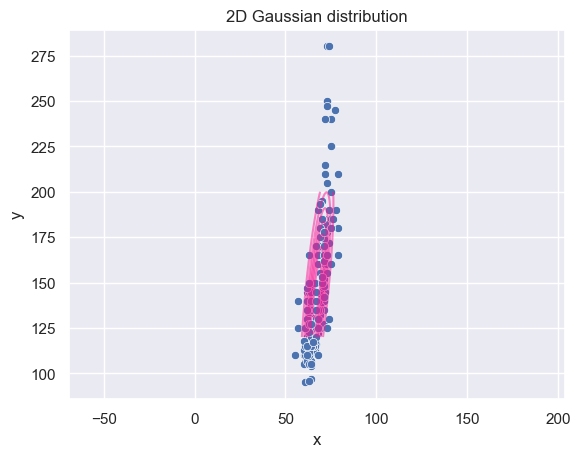

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "./HeightWeightData.csv"
df = pd.read_csv(path)

sns.set()
sns.scatterplot(x="weight", y="height",data=df)

# 在矩阵X中，每一行代表一个样本
X = df[["weight","height"]].values

# 计算样本均值向量
mean_vector = np.mean(X, axis=0)

# 计算样本协方差矩阵 1
cov_matrix = np.cov(X.T)
# 计算样本协方差矩阵 2
Y = X - mean_vector
cov = np.matmul(Y.T, Y)/ (len(df) -1)

print("均值向量:", mean_vector)
print("np方法协方差矩阵:", cov_matrix)
print("手动计算协方差矩阵:", cov)


x = np.linspace(55,80, 250)
y = np.linspace(120,200, 800)
X_, Y_ = np.meshgrid(x,y)
Z = np.dstack((X_,Y_))

# 计算二维高斯分布的概率密度函数
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...',  pos-mu,Sigma_inv,pos-mu)
    return np.exp(-fac / 2) / N

# 计算每个网格点的概率密度
pdf = multivariate_gaussian(Z, mean_vector, cov)
#绘制等高线图
plt.contour(X_, Y_, pdf, colors='deeppink', alpha=0.5)
plt.title('2D Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(50, 80)
plt.ylim(90, 280)
plt.axis('equal')
plt.show()